# 05 - Bag of Words (BoW) - Bolsa de Palabras

* La Bolsa de Palabras (***BoW***) es un modelo que se utiliza para simplificar el contenido de un documento (o conjunto de documentos) omitiendo la gramática y el orden de las palabras, centrándose solo en el número de ocurrencias de palabras dentro del texto (o corpus).


* A continuación se muestra con código python como obtendríamos una bolsa de palabras a partir del siguiente "corpus":

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

documents = ["balon balon balon futbol futbol liga liga liga ronaldo ronaldo ronaldo messi",
            "futbol futbol futbol futbol futbol ronaldo ronaldo ronaldo ronaldo messi messi",
            "balon balon futbol futbol futbol futbol futbol futbol messi messi messi messi",
            "politica politica politica pp pp pp pp pp pp rajoy rajoy rajoy rajoy rajoy",
            "politica politica politica politica pp pp psoe psoe psoe psoe zapatero zapatero rajoy",
            "politica politica politica psoe psoe psoe psoe zapatero zapatero zapatero zapatero ",
            "dinero fmi fmi fmi fmi fmi ue ue ue ue pib pib pib ibex ibex",
            "zapatero rajoy dinero dinero dinero dinero fmi fmi fmi fmi ue ue ue ue pib",
            "pp psoe zapatero rajoy dinero dinero dinero dinero fmi fmi fmi fmi ue ue ue ",
            "futbol politica pib",
            "futbol liga politica zapatero rajoy"]

### Construimos la bolsa de palabras

In [2]:
# Construimos la bolsa de palabras
bow = dict()
for doc in documents:
    doc = doc.split(' ')
    for word in doc:
        if word in bow:
            bow[word] += 1
        else:
            bow[word] = 1
print(bow)

{'balon': 5, 'futbol': 15, 'liga': 4, 'ronaldo': 7, 'messi': 7, 'politica': 12, 'pp': 9, 'rajoy': 9, 'psoe': 9, 'zapatero': 9, '': 2, 'dinero': 9, 'fmi': 13, 'ue': 11, 'pib': 5, 'ibex': 2}


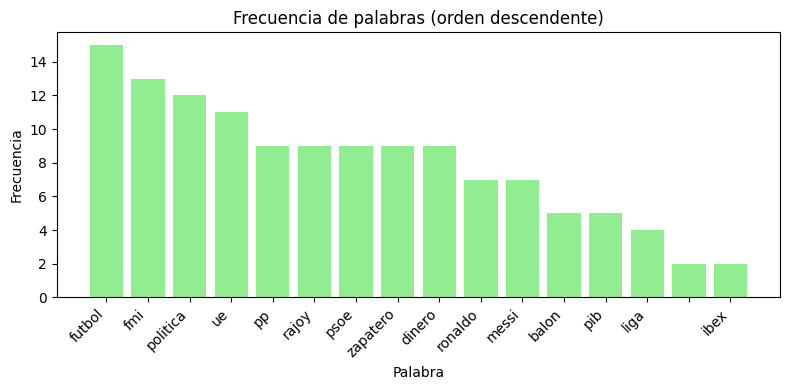

In [3]:
import matplotlib.pyplot as plt

# Ordenar el diccionario por frecuencia en forma descendente
sorted_bow = dict(sorted(bow.items(), key=lambda item: item[1], reverse=True))

# Convertir el diccionario en listas separadas de claves y valores
words = list(sorted_bow.keys())
counts = list(sorted_bow.values())

# Diagramar
plt.figure(figsize=(8, 4))
plt.bar(words, counts, color='lightgreen')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de palabras (orden descendente)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


* La construcción de las bolsas de palabras no solo se centran en la frecuencia si no que existen otras maneras de asignar un "peso" o "importancia" dentro del documento o del corpus a las palabras.


* Aunque existen más formas de construir bolsas de palabras, las más utilizadas son las siguiente:

    1. [Vectores de Frecuencias](#1--vectores-de-frecuencias)
    2. [One-Hot-Encode](#2--one-hot-encode)
    3. [Term Frequency-Inverse Document Frequency](#3--term-frequency-inverse-document-frequency-tf-idf) (TF-IDF)
    
    
* Veamos a continuación como implementar estas bolsas de palabras con las siguientes librerías:

    * ***scikit***
    * ***NLTK***
    * ***Gensim***
    
    
<hr>


# 1.- Vectores de Frecuencias

* Los ***vectores de frecuencias*** es el método más trivial de construir las ***Bolsas de Palabras***.


* Simplemente consiste en contar cuantas veces aparece una palabra en el documento del corpus.


### -Scikit

* Esta librería devuelve una matriz en la que las **filas representan a cada documento del corpus** y las **columnas el número de apariciones de las palabras**.


* Para saber que palabra corresponde a cada columan de la matriz, scikit nos devuelve una lista en la que coinciden los indice de cada una de las palabras de la lista con la matriz.


* Para más información ver el siguiente enlace: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html


In [4]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectors = vectorizer.fit_transform(documents)

# Resultados
print(vectorizer.get_feature_names_out())
print(vectors.toarray())

['balon' 'dinero' 'fmi' 'futbol' 'ibex' 'liga' 'messi' 'pib' 'politica'
 'pp' 'psoe' 'rajoy' 'ronaldo' 'ue' 'zapatero']
[[3 0 0 2 0 3 1 0 0 0 0 0 3 0 0]
 [0 0 0 5 0 0 2 0 0 0 0 0 4 0 0]
 [2 0 0 6 0 0 4 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 3 6 0 5 0 0 0]
 [0 0 0 0 0 0 0 0 4 2 4 1 0 0 2]
 [0 0 0 0 0 0 0 0 3 0 4 0 0 0 4]
 [0 1 5 0 2 0 0 3 0 0 0 0 0 4 0]
 [0 4 4 0 0 0 0 1 0 0 0 1 0 4 1]
 [0 4 4 0 0 0 0 0 0 1 1 1 0 3 1]
 [0 0 0 1 0 0 0 1 1 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 0 1 0 0 1 0 0 1]]


### -NLTK

* NLTK trabajar con diccionarios (un diccionario por documento) cuyas claves son las palabras y los valores son el número de apariciones de esa palabra en el documento.

In [5]:
import nltk
from collections import defaultdict

def tokenize(text):
    for token in nltk.word_tokenize(text):
        yield token

def vectorize(corpus):
    features = defaultdict(int)
    for token in tokenize(corpus):
        features[token] += 1
    return features

vectors = map(vectorize, documents)

# Resultados
for v in vectors:
    print(v)

defaultdict(<class 'int'>, {'balon': 3, 'futbol': 2, 'liga': 3, 'ronaldo': 3, 'messi': 1})
defaultdict(<class 'int'>, {'futbol': 5, 'ronaldo': 4, 'messi': 2})
defaultdict(<class 'int'>, {'balon': 2, 'futbol': 6, 'messi': 4})
defaultdict(<class 'int'>, {'politica': 3, 'pp': 6, 'rajoy': 5})
defaultdict(<class 'int'>, {'politica': 4, 'pp': 2, 'psoe': 4, 'zapatero': 2, 'rajoy': 1})
defaultdict(<class 'int'>, {'politica': 3, 'psoe': 4, 'zapatero': 4})
defaultdict(<class 'int'>, {'dinero': 1, 'fmi': 5, 'ue': 4, 'pib': 3, 'ibex': 2})
defaultdict(<class 'int'>, {'zapatero': 1, 'rajoy': 1, 'dinero': 4, 'fmi': 4, 'ue': 4, 'pib': 1})
defaultdict(<class 'int'>, {'pp': 1, 'psoe': 1, 'zapatero': 1, 'rajoy': 1, 'dinero': 4, 'fmi': 4, 'ue': 3})
defaultdict(<class 'int'>, {'futbol': 1, 'politica': 1, 'pib': 1})
defaultdict(<class 'int'>, {'futbol': 1, 'liga': 1, 'politica': 1, 'zapatero': 1, 'rajoy': 1})


### -Gensim

* ***Gensim trabaja con "Diccionarios"*** (gensim.corpora.Dictionary) que es una estructura de datos en la que guarda el orden de las palabras que hay en el corpus.


* Posteriormente se construye la Bolsa de Palabras con las frecuencias con la función "***doc2bow***"


* Como resultado devuelve una lista por cada documento en la que se indicida por cada palabra del documento identificada por el 'id' del diccionario previamente construido la frecuencia de esa palabra en el documento.


* Para más información ver el siguiente enlace: https://radimrehurek.com/gensim/corpora/dictionary.html

In [6]:
import nltk
import gensim

tokenize = [nltk.word_tokenize(text) for text in documents]
dictionary = gensim.corpora.Dictionary(tokenize)
vectors = [dictionary.doc2bow(token) for token in tokenize]

# Resultados
print('Diccionario de palabras -> palabra: frecuencia\n')
print(dictionary.token2id)
print('\nApariciones de las palabras en los documentos:')
vectors

Diccionario de palabras -> palabra: frecuencia

{'balon': 0, 'futbol': 1, 'liga': 2, 'messi': 3, 'ronaldo': 4, 'politica': 5, 'pp': 6, 'rajoy': 7, 'psoe': 8, 'zapatero': 9, 'dinero': 10, 'fmi': 11, 'ibex': 12, 'pib': 13, 'ue': 14}

Apariciones de las palabras en los documentos:


[[(0, 3), (1, 2), (2, 3), (3, 1), (4, 3)],
 [(1, 5), (3, 2), (4, 4)],
 [(0, 2), (1, 6), (3, 4)],
 [(5, 3), (6, 6), (7, 5)],
 [(5, 4), (6, 2), (7, 1), (8, 4), (9, 2)],
 [(5, 3), (8, 4), (9, 4)],
 [(10, 1), (11, 5), (12, 2), (13, 3), (14, 4)],
 [(7, 1), (9, 1), (10, 4), (11, 4), (13, 1), (14, 4)],
 [(6, 1), (7, 1), (8, 1), (9, 1), (10, 4), (11, 4), (14, 3)],
 [(1, 1), (5, 1), (13, 1)],
 [(1, 1), (2, 1), (5, 1), (7, 1), (9, 1)]]

<hr>


# 2.- One-Hot-Encode

* Este método de construcción de la ***Bolsa de Palabras*** consiste en indicar con un flag ([0,1], [True, False], etc.) si una palabra aparece o no en el documento.


### -Scikit

* Las estructuras de datos de salida de ***Scikit*** son iguales de en el caso de la construcción del vector de frecuencias salvo que en el contenido de la matriz solo hay ceros y unos.


* Para más información ver el siguiente enlace: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Binarizer.html#sklearn.preprocessing.Binarizer


In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Binarizer


vectorizer = CountVectorizer()
corpus = vectorizer.fit_transform(documents)

onehot = Binarizer()
corpus = onehot.fit_transform(corpus.toarray())

# Resultados
print(vectorizer.get_feature_names_out())
print(corpus)

['balon' 'dinero' 'fmi' 'futbol' 'ibex' 'liga' 'messi' 'pib' 'politica'
 'pp' 'psoe' 'rajoy' 'ronaldo' 'ue' 'zapatero']
[[1 0 0 1 0 1 1 0 0 0 0 0 1 0 0]
 [0 0 0 1 0 0 1 0 0 0 0 0 1 0 0]
 [1 0 0 1 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1 0 0 1]
 [0 0 0 0 0 0 0 0 1 0 1 0 0 0 1]
 [0 1 1 0 1 0 0 1 0 0 0 0 0 1 0]
 [0 1 1 0 0 0 0 1 0 0 0 1 0 1 1]
 [0 1 1 0 0 0 0 0 0 1 1 1 0 1 1]
 [0 0 0 1 0 0 0 1 1 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 0 1 0 0 1 0 0 1]]


### -NLTK

* La estructura de datos de salida de ***NLTK*** es la misma que en el caso de la construcción del vector de frecuencias salvo que los valores del diccionario son ***booleanos*** en vez de numéricos.

In [8]:
import nltk

def tokenize(text):
    for token in nltk.word_tokenize(text):
        yield token

def vectorize(corpus):
    return {token: True for token in tokenize(corpus)}

vectors = map(vectorize, documents)

# Resultados
for v in vectors:
    print(v)

{'balon': True, 'futbol': True, 'liga': True, 'ronaldo': True, 'messi': True}
{'futbol': True, 'ronaldo': True, 'messi': True}
{'balon': True, 'futbol': True, 'messi': True}
{'politica': True, 'pp': True, 'rajoy': True}
{'politica': True, 'pp': True, 'psoe': True, 'zapatero': True, 'rajoy': True}
{'politica': True, 'psoe': True, 'zapatero': True}
{'dinero': True, 'fmi': True, 'ue': True, 'pib': True, 'ibex': True}
{'zapatero': True, 'rajoy': True, 'dinero': True, 'fmi': True, 'ue': True, 'pib': True}
{'pp': True, 'psoe': True, 'zapatero': True, 'rajoy': True, 'dinero': True, 'fmi': True, 'ue': True}
{'futbol': True, 'politica': True, 'pib': True}
{'futbol': True, 'liga': True, 'politica': True, 'zapatero': True, 'rajoy': True}


### -Gensim

* La estructura de datos de salida de ***Gensim*** es la misma que en el caso de la construcción de la Bolsa de Palabras de frecuencias salvo que los valores de las palabras en los documentos solo tendrán valor '1'.


* Para más información ver el siguiente enlace: https://radimrehurek.com/gensim/corpora/dictionary.html

In [9]:
import nltk
import gensim

tokenize = [nltk.word_tokenize(text) for text in documents]
dictionary = gensim.corpora.Dictionary(tokenize)
vectors = [[(token[0], 1) for token in dictionary.doc2bow(doc)] for doc in tokenize]

# Resultados
print('Diccionario de palabras -> palabra: id\n')
print(dictionary.token2id)
print('\nApariciones de las palabras en los documentos (id, 1):')
vectors

Diccionario de palabras -> palabra: id

{'balon': 0, 'futbol': 1, 'liga': 2, 'messi': 3, 'ronaldo': 4, 'politica': 5, 'pp': 6, 'rajoy': 7, 'psoe': 8, 'zapatero': 9, 'dinero': 10, 'fmi': 11, 'ibex': 12, 'pib': 13, 'ue': 14}

Apariciones de las palabras en los documentos (id, 1):


[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)],
 [(1, 1), (3, 1), (4, 1)],
 [(0, 1), (1, 1), (3, 1)],
 [(5, 1), (6, 1), (7, 1)],
 [(5, 1), (6, 1), (7, 1), (8, 1), (9, 1)],
 [(5, 1), (8, 1), (9, 1)],
 [(10, 1), (11, 1), (12, 1), (13, 1), (14, 1)],
 [(7, 1), (9, 1), (10, 1), (11, 1), (13, 1), (14, 1)],
 [(6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (14, 1)],
 [(1, 1), (5, 1), (13, 1)],
 [(1, 1), (2, 1), (5, 1), (7, 1), (9, 1)]]

<hr>


# 3.- Term Frequency-Inverse Document Frequency (TF-IDF)


* El TF-IDF (Frecuencia de Termino - Frecuencia Inversa de Documento) es una medida numérica que permite expresar como de relevante es una palabra para un documento en una colección de documentos (o corpus).


* Construir la Bolsa de Palabras con TF-IDF en vez de con frecuencias evita dar "importancia" a texto muy largos y con mucha repetición de palabras, frente a textos cortos y con pocas repeticiones de palabras.


* La media de ***TF-IDF*** tiene dos componentes que son:
    
    * ***TF*** (Term Frecuency): Es la frecuencia con la que aparece la palabra en un documento del corpus. Esta se define como:
    
    $$tf(t,d) = 1 + log(f_{t,d})$$
    
    * ***IDF*** (Inverse Document Frequency): La frecuencia inversa del documento nos indica lo común que es una palabra en el corpus.
    
    $$idf(t,D) = log(1 + \frac{N}{n_t})$$
    

* ***TF-IDF*** queda definido como:
$$tfidf(t,d,D) = tf(t,d) \cdot idf(t,D)$$



### Ejemplos:

* Veamos un ejemplo dado el siguiente corpus de 2 documentos con las siguientes palabras:

```
corpus = ["messi messi messi ronaldo ronaldo balon",
          "messi ronaldo futbol futbol futbol"]
```

* ***Ejemplo 1***: Calculamos el ***tf-idf*** de la palabra "**messi**" para el documento 1:
    
    * ***TF***:
        - t: número de veces que aparece la palabra "messi" en el documento 1 -> 3
        - d: número de palabras que tiene el documento 1 -> 6
        $$tf(t,d) = 1 + log(\frac{3}{6}) =  0,69$$
        
    * ***IDF***:
        - n<sub>t</sub>: número de documentos en los que aparece la palabra 'messi' -> 2
        - D: número total de documentos en el corpus -> 2
        $$idf(t,D) = log(1 + \frac{2}{2}) = 0,3$$
        
    * ***TF-IDF***:
    $$tfidf(t,d,D) = tf(t,d) \cdot idf(t,D) = 0,69 * 0,3 = 0,21$$
    
    
* ***Ejemplo 2***: Calculamos el ***tf-idf*** de la palabra "**futbol**" para el documento 2:
    
    * ***TF***:
        - t: número de veces que aparece la palabra "futbol" en el documento 2 -> 3
        - d: número de palabras que tiene el documento 1 -> 5
        $$tf(t,d) = 1 + log(\frac{3}{5}) =  0,78$$
        
    * ***IDF***:
        - n<sub>t</sub>: número de documentos en los que aparece la palabra 'futbol' -> 1
        - D: número total de documentos en el corpus -> 2
        $$idf(t,D) = log(1 + \frac{2}{1}) = 0,48$$
        
    * ***TF-IDF***:
    $$tfidf(t,d,D) = tf(t,d) \cdot idf(t,D) = 0,78 * 0,48 = 0,37$$
        

## Implementación:


* El ejemplo mostrado anteriormente se ha realizado sobre el un TF-IDF teórico, calculando la frecuencia escalada logaritmicamente y sobre un corpus de "juguete" para entender el concepto.


* Las implementaciones del ***TF-IDF*** de **Scikit** y **Gensim** estan pensadas para corpus con un número relevante de documentos y de palabras, por tanto la implementación del ***TF-IDF*** acepta una serie de parámetros para no tener en cuenta Stop Words, palabras irrelevantes, etc. por lo que si se realiza una implementación del ***TF-IDF*** según la bibliografia no van a conincidir los resultados de esa implementación con los resultados de las librerías de **Scikit** y **Gensim** a no ser que se modifiquen los parámetros de las funciones del ***TF-IDF***.


### -Scikit

* Las estructuras de datos de salida de ***Scikit*** son iguales de en el caso de la construcción del vector de frecuencias salvo que en el contenido de la matriz será de números decimales en vez de números enteros.


* Para más información ver el siguiente enlace: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
corpus = tfidf.fit_transform(documents)

# Resultados
print(tfidf.get_feature_names_out ())
print(corpus.toarray())

['balon' 'dinero' 'fmi' 'futbol' 'ibex' 'liga' 'messi' 'pib' 'politica'
 'pp' 'psoe' 'rajoy' 'ronaldo' 'ue' 'zapatero']
[[0.54967598 0.         0.         0.26000769 0.         0.54967598
  0.16113642 0.         0.         0.         0.         0.
  0.54967598 0.         0.        ]
 [0.         0.         0.         0.63030611 0.         0.
  0.31249927 0.         0.         0.         0.         0.
  0.71067462 0.         0.        ]
 [0.34051088 0.         0.         0.72480795 0.         0.
  0.59892051 0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.31745291 0.78694939 0.         0.52908818
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.55616781 0.34467783 0.68935567 0.13904195
  0.         0.         0.27808391]
 [0.         0.         0.         0.         0.         0.
  0.         0. 

### -Gensim

* La estructura de datos de salida de ***Gensim*** es la misma que en el caso de la construcción de la Bolsa de Palabras de frecuencias salvo que los valores de las palabras en los documentos tendrán números decimales en vez de números enteros.


* Para más información ver el siguiente enlace: https://radimrehurek.com/gensim/models/tfidfmodel.html

In [11]:
import nltk
import gensim

tokenize = [nltk.word_tokenize(text) for text in documents]
dictionary = gensim.corpora.Dictionary(tokenize)
tfidf = gensim.models.TfidfModel(dictionary=dictionary, normalize=True)
vectors = [tfidf[dictionary.doc2bow(doc)] for doc in tokenize]

# Resultados
print('Diccionario de palabras -> palabra: id\n')
print(dictionary.token2id)
print('\nApariciones de las palabras en los documentos (id, tfidf):')
vectors

Diccionario de palabras -> palabra: id

{'balon': 0, 'futbol': 1, 'liga': 2, 'messi': 3, 'ronaldo': 4, 'politica': 5, 'pp': 6, 'rajoy': 7, 'psoe': 8, 'zapatero': 9, 'dinero': 10, 'fmi': 11, 'ibex': 12, 'pib': 13, 'ue': 14}

Apariciones de las palabras en los documentos (id, tfidf):


[[(0, 0.5625782665647677),
  (1, 0.17346413313634462),
  (2, 0.5625782665647677),
  (3, 0.14292402346071878),
  (4, 0.5625782665647677)],
 [(1, 0.4753096556596214), (3, 0.3133012785909152), (4, 0.8221453886448734)],
 [(0, 0.4364883596941802), (1, 0.6056363309296559), (3, 0.6653439309932482)],
 [(5, 0.2613558865696037), (6, 0.8613661899618252), (7, 0.43559314428267276)],
 [(5, 0.46092812545169537),
  (6, 0.3797770814326364),
  (7, 0.11523203136292384),
  (8, 0.7595541628652728),
  (9, 0.23046406272584768)],
 [(5, 0.3626105786520071), (8, 0.7967182135514425), (9, 0.4834807715360095)],
 [(10, 0.12439479522615843),
  (11, 0.6219739761307922),
  (12, 0.4591543106110927),
  (13, 0.3731843856784753),
  (14, 0.4975791809046337)],
 [(7, 0.08604721233664431),
  (9, 0.08604721233664431),
  (10, 0.5671818639333573),
  (11, 0.5671818639333573),
  (13, 0.14179546598333934),
  (14, 0.5671818639333573)],
 [(6, 0.1512091023340141),
  (7, 0.09175978685592859),
  (8, 0.1512091023340141),
  (9, 0.09175978